In [536]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
df = pd.read_csv('sewellsptlevels.csv')
print(df)
print(max(df['GAUGE M NAVD88']))

        DATE  GAUGE M NAVD88  GAUGE M MLLW    ACTION  ACTION M MLLW     FLOOD  \
0     4/1/56        1.924728      1.434000  1.709928         1.2192  1.862328   
1    9/18/36        2.538984      2.048256  1.709928         1.2192  1.862328   
2    9/12/60        2.295144      1.804416  1.709928         1.2192  1.862328   
3   11/12/09        2.849880      2.359152  1.709928         1.2192  1.862328   
4    4/11/56        2.417064      1.926336  1.709928         1.2192  1.862328   
..       ...             ...           ...       ...            ...       ...   
73   5/19/20        1.996440      1.505712  1.709928         1.2192  1.862328   
74   6/16/20        1.880616      1.389888  1.709928         1.2192  1.862328   
75   8/16/20        1.905000      1.414272  1.709928         1.2192  1.862328   
76   9/21/20        2.045208      1.554480  1.709928         1.2192  1.862328   
77  10/17/20        1.908048      1.417320  1.709928         1.2192  1.862328   

    FLOOD M MLLW  MODERATE 

FLOOD       43
MODERATE    17
MAJOR       11
ACTION       7
Name: CLASS, dtype: int64


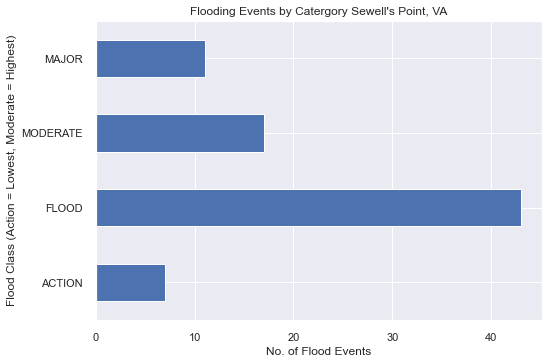

In [537]:
gauge = df['GAUGE M NAVD88']
#separate the events by flood type
action_stage = df['ACTION']
flood_stage = df['FLOOD']
moderate_flood = df['MODERATE']
major = df['MAJOR']
date = df['DATE']
floodclass = df['CLASS']
floods = floodclass.value_counts().loc[['ACTION','FLOOD','MODERATE','MAJOR']].plot.barh()
plt.style.use('seaborn')
plt.xlabel("No. of Flood Events")
plt.ylabel("Flood Class (Action = Lowest, Moderate = Highest)")
plt.title("Flooding Events by Catergory Sewell's Point, VA")
print(floodclass.value_counts())

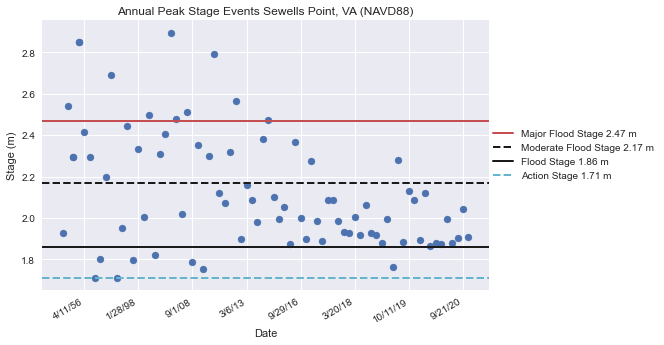

In [538]:
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
plt.scatter(date,gauge)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Stage (m)")
plt.title('Annual Peak Stage Events Sewells Point, VA (NAVD88)')
plt.axhline(y=1.71, color='c', linestyle='--',label='Action Stage 1.71 m',lw=2)
plt.axhline(y=1.86, color='k', linestyle='-',label='Flood Stage 1.86 m',lw=2)
plt.axhline(y=2.17, color='k', linestyle='--',label='Moderate Flood Stage 2.17 m',lw=2)
plt.axhline(y=2.47, color='r', linestyle='-',label='Major Flood Stage 2.47 m',lw=2)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)
#plt.legend(bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)

Text(0.5, 1.0, 'Events with "ACTION" designation (NAVD88)')

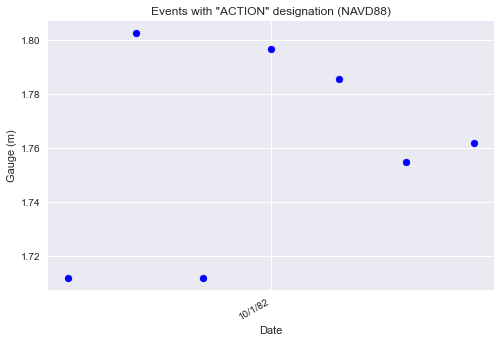

In [539]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'ACTION']
del floods["FLOOD"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M NAVD88']
dates = floods['DATE']
plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "ACTION" designation (NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "FLOOD" designation (NAVD88)')

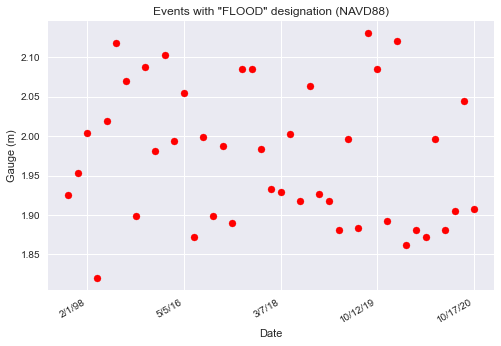

In [540]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'FLOOD']
del floods["ACTION"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M NAVD88']
#flow = floods['FLOW CMS']
dates = floods['DATE']
plt.scatter(dates,gauge, color = 'red')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "FLOOD" designation (NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "MODERATE" designation (NAVD88)')

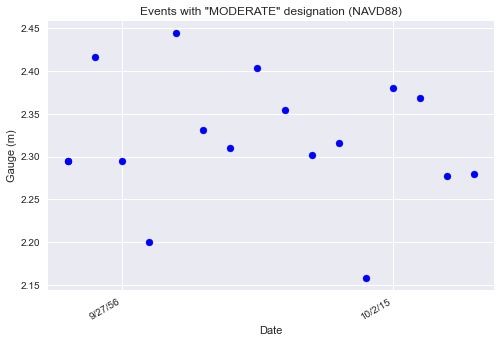

In [541]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'MODERATE']
del floods["ACTION"]
del floods["FLOOD"]
#del floods["MODERATE STAGE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M NAVD88']

dates = floods['DATE']
plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "MODERATE" designation (NAVD88)')

Text(0.5, 1.0, 'Cause of Flood Event Sewells Point, VA')

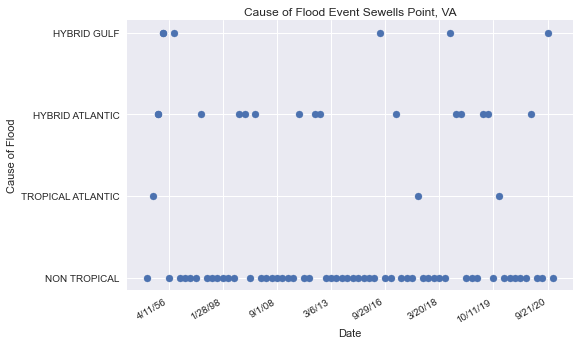

In [542]:
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE'].astype(str)
plt.style.use('seaborn')
plt.scatter(date,contributor)
#plt.yticks(['ACTION','FLOOD','MODERATE','MAJOR'])
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cause of Flood")
plt.title('Cause of Flood Event Sewells Point, VA')


Text(0.5, 1.0, 'Type of Flood Event Sewells Point, VA')

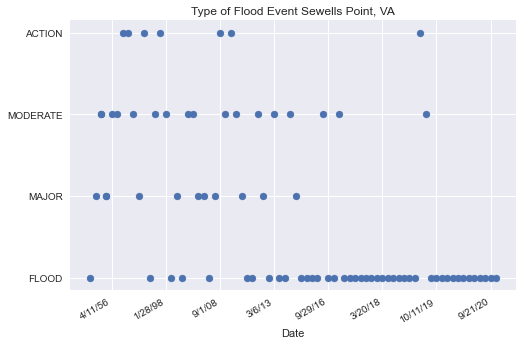

In [543]:
import seaborn as sns
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE']
plt.style.use('seaborn')
#sns.catplot(x= date, y=floodclass, hue = contributor, data=df)
plt.scatter(date,floodclass)
y_ticks_labels = ['NONE','ACTION','FLOOD','MODERATE','MAJOR']
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
#plt.ylabel("Type of Flood"
plt.title('Type of Flood Event Sewells Point, VA')

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [545]:
data = pd.read_csv('sewellsptlevels.csv')
print(df["CLASS"])

0        FLOOD
1        MAJOR
2     MODERATE
3        MAJOR
4     MODERATE
        ...   
73       FLOOD
74       FLOOD
75       FLOOD
76       FLOOD
77       FLOOD
Name: CLASS, Length: 78, dtype: object


Text(0.5, 1.0, 'Flood Event by Type Sewells Point, VA')

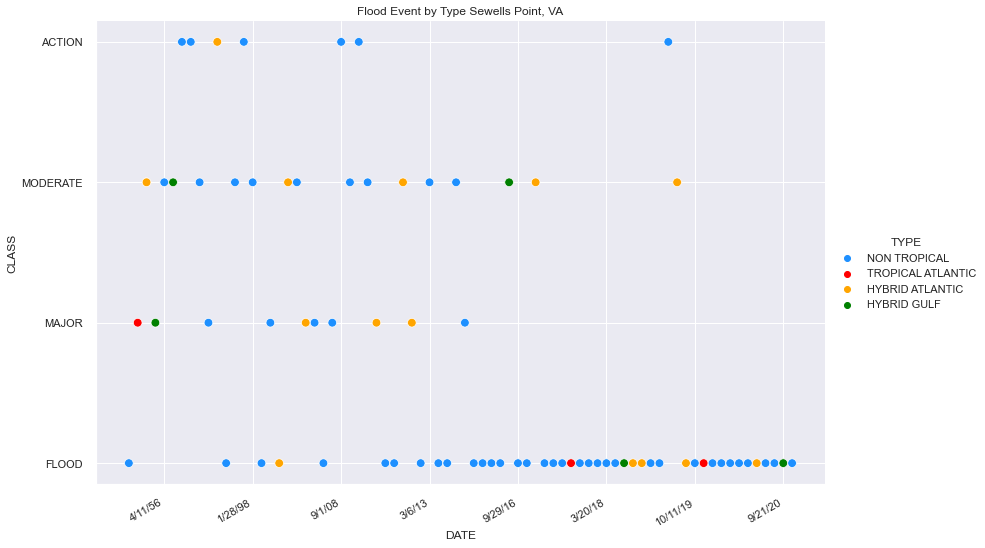

In [546]:
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x="DATE", y='CLASS', hue = ("TYPE"), data=data,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().invert_yaxis()
plt.title('Flood Event by Type Sewells Point, VA')
